# HW02 Question 4: Monty Hall

In [221]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [222]:
# radom function to decide behind which door the car is (car = 1, goat = 0)

def decideCar():
    gameVec = np.zeros(3)
    gameVec[np.random.randint(3)] = 1
        
    return gameVec

In [223]:
# random function to decide which player choose which door

def playersDoors():
    
    playersChoice = {
        "p1" : np.random.randint(3),
        "p2" : np.random.randint(3),
        "p3" : np.random.randint(3),
    }
    return playersChoice

In [224]:
# function to decide which door the host opens

def hostOpenDoor(playersDoor,gameVec):
    
    hostDoor = 0
    if(gameVec[playersDoor]):
        
        # host randomly chooses between doors with goats

        hostDoor = np.random.randint(3)
        while( hostDoor == playersDoor): 
            hostDoor = np.random.randint(3)
         # keep randing doors until you choose a goat (different door than players')
    
    else:

        tmp = np.where(gameVec==1)
        hostDoor = 3-playersDoor-tmp[0] #algo to make the host always choose the door with the goat
        
    return hostDoor


In [225]:
def changeDoor(player, playerDict, hostDoor):
    choice = ['switchDoor', 'keepDoor'] # to decide if to switch the door or keep current door
    
    if(player == "p1"):
        
        #play the game according to p1
        return playerDict # door won't change
        
    elif(player == "p2"):
        
        #play the game according to p2
        playerDict[player] = 3 - hostDoor - playerDict[player] # always change door
        
    else:
    
        #play the game according to p3
        p3_choice = random.choices(choice, [.5, .5])[0] # switch in probability of .5
        if(p3_choice == "switchDoor"):
            playerDict[player] = 3 - hostDoor - playerDict[player] # switch door
        
    return playerDict
    

In [226]:
def didWin(player,playerDict,gameVec):
    if(gameVec[playerDict[player]]):
        #print("WIN!")
        return 1
    #print("LOOSE!")
    return 0

In [227]:
def playGame(player_):
    gameVec_ = decideCar()
    playersChoice_ = playersDoors() # creat dictionary
    #assume play game with p1
    player_name = player_ #player's name
    player_choice = playersChoice_[player_name] #choose players value from dictionary
    hostDoor = hostOpenDoor(player_choice,gameVec_)
    #print(gameVec_)
    #print("player 1 choose door number %d" %(player_choice + 1))
    #print("host choose door number %d" %(hostDoor + 1))
    playersChoice_ = changeDoor(player_name,playersChoice_,hostDoor)
    #print("player 1 choose door number %d" %(playersChoice_[player_name] + 1))
    return didWin(player_name,playersChoice_,gameVec_)

In [248]:
def p1Games():
    N = 1000
    tmp = 0
    cum_res = np.array([])
    for i in range(N):
        tmp += playGame("p1")
        cum_res = np.append(cum_res,tmp)
    
    cum_res /= N
    plt.figure()
    plt.plot(cum_res)
    plt.ylim([0,1])
    return

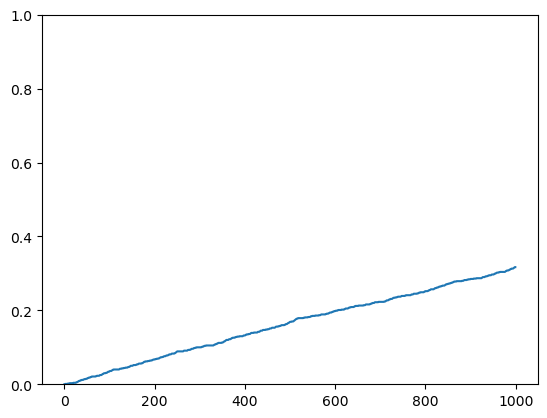

In [249]:
p1Games()